Universidad Torcuato Di Tella

Licenciatura en Tecnología Digital\
**Tecnología Digital VI: Inteligencia Artificial**

# **Taller de árboles de decisión en scikit-learn**

El objetivo de este taller es, utilizando los datos con los que venimos trabajando la clase de hoy, **experimentar** con árboles de decisión.

In [1]:
import pandas as pd

X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

Resolver las siguientes consignas.

### **Consigna 1**

> Probar distintos valores para el hiperparámetro `max_depth` y graficar la *performance* (*accuracy*) sobre `X_test` al variar este hiperparámetro. Comentar el gráfico obtenido.

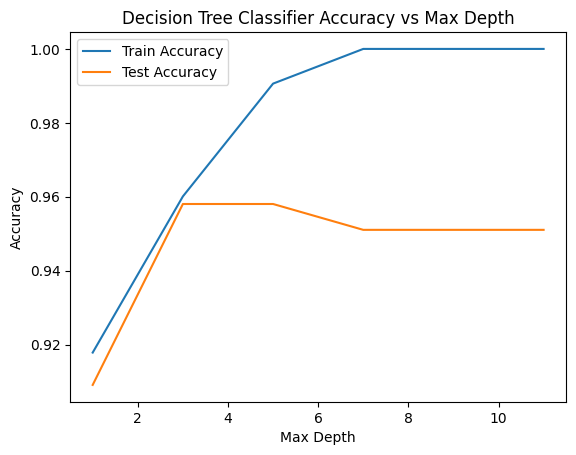

In [2]:
# COMPLETAR.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


max_depth = [1, 3, 5, 7, 9, 11]
accuracy_test = []
accuracy_train = []

for depth in max_depth:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42, criterion='entropy')
    model.fit(X_train, y_train)
    accuracy_train.append(accuracy_score(y_train, model.predict(X_train)))
    accuracy_test.append(accuracy_score(y_test, model.predict(X_test)))

plt.plot(max_depth, accuracy_train, label="Train Accuracy")
plt.plot(max_depth, accuracy_test, label="Test Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Classifier Accuracy vs Max Depth")
plt.legend()
plt.show()




**Respuesta**: A medida que se incrementa la profundidad del árbol, la precisión (accuracy) en los datos de entrenamiento crece continuamente, ya que el modelo se adapta cada vez mejor a ellos, incluso capturando patrones muy específicos o ruido.
En los datos de prueba, la precisión también mejora al principio, pero a partir de cierto punto deja de aumentar y se estabiliza (alrededor de 0.95 en este caso). Esto ocurre porque, más allá de ese punto, el árbol comienza a sobreajustarse a los datos de entrenamiento, aprendiendo detalles que no generalizan bien. Por eso, aumentar indefinidamente la profundidad no garantiza una mejor capacidad de predicción sobre datos nuevos.

### **Consigna 2**

> ¿Cuál es el máximo valor de profundidad que se alcanza al dejar los hiperparámetros por defecto?

In [3]:
# COMPLETAR.
from sklearn.tree import DecisionTreeClassifier

modelo_2 = DecisionTreeClassifier(random_state=42)
modelo_2.fit(X_train, y_train)
modelo_2.get_depth()


8

**Respuesta**: La profundidad máxima que encuentra es de 8

### **Consigna 3**

> Probar distintos valores para el hiperparámetro `min_samples_leaf` y graficar la performance sobre `X_test` al variar este hiperparámetro. Comentar el gráfico obtenido.

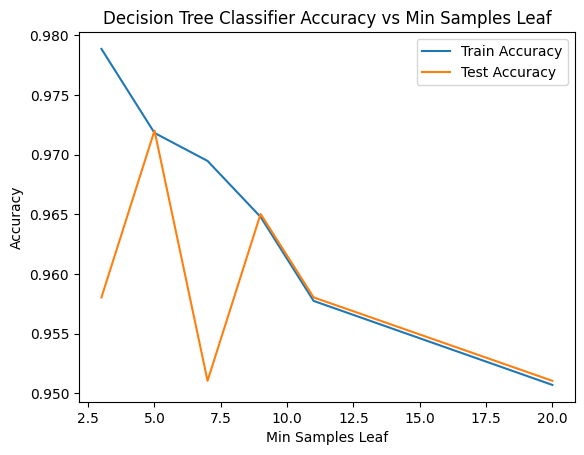

In [4]:
# COMPLETAR.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


min_samples_leaf = [3, 5, 7, 9, 11, 20]
accuracy_2_train = []
accuracy_2_test = []

for min_samples in min_samples_leaf:
    model = DecisionTreeClassifier(min_samples_leaf=min_samples, random_state=42, criterion='entropy')
    model.fit(X_train, y_train)
    accuracy_2_train.append(accuracy_score(y_train, model.predict(X_train)))
    accuracy_2_test.append(accuracy_score(y_test, model.predict(X_test)))

plt.plot(min_samples_leaf, accuracy_2_train, label="Train Accuracy")
plt.plot(min_samples_leaf, accuracy_2_test, label="Test Accuracy")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Accuracy")
plt.title("Decision Tree Classifier Accuracy vs Min Samples Leaf")
plt.legend()
plt.show()

**Respuesta**: Podemos observar un trade-off entre complejidad y capacidad de generalización.
- Con valores pequeños de min_samples_leaf, el modelo se vuelve muy complejo y se produce overfitting.
- Con valores grandes, el modelo es demasiado simple y se produce underfitting.

Por lo tanto, un valor intermedio (en este caso, n=5) logra un equilibrio adecuado, permitiendo un ajuste correcto de los datos y un accuracy mayor en el conjunto de prueba.

### **Consigna 4**

> Considerar los valores propuestos para `max_depth` en la consigna 1 y aquellos para `min_samples_leaf` en la consigna 3. Reportar la accuracy sobre `X_train` y `X_test` de un árbol definido para cada combinación posible entre dichos valores. Comentar los resultados obtenidos.

In [5]:
# COMPLETAR.

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


import numpy as np

min_samples_leaf = [3, 5, 7, 9, 11, 20, 100]
max_depth = [3, 5, 7, 9, 11, 100]
accuracy_entrenamiento = []
accuracy_testt = []

for min_samples in min_samples_leaf:
    for depth in max_depth:
        model = DecisionTreeClassifier(min_samples_leaf=min_samples, max_depth=depth, random_state=42)
        model.fit(X_train, y_train)
        accuracy_entrenamiento.append(accuracy_score(y_train, model.predict(X_train)))
        accuracy_testt.append(accuracy_score(y_test, model.predict(X_test)))

# Convertir a DataFrame
entrenamiento_df = pd.DataFrame(
    np.array(accuracy_entrenamiento).reshape(len(min_samples_leaf), len(max_depth)),
    index=min_samples_leaf,
    columns=max_depth
)
test_df = pd.DataFrame(
    np.array(accuracy_testt).reshape(len(min_samples_leaf), len(max_depth)),
    index=min_samples_leaf,
    columns=max_depth
)

print("Accuracy en entrenamiento:")
display(entrenamiento_df)
print("Accuracy en test:")
display(test_df)



Accuracy en entrenamiento:


,3,5,7,9,11,100
3,0.953052,0.978873,0.978873,0.978873,0.978873,0.978873
5,0.950704,0.971831,0.971831,0.971831,0.971831,0.971831
7,0.943662,0.964789,0.964789,0.964789,0.964789,0.964789
9,0.943662,0.962441,0.962441,0.962441,0.962441,0.962441
11,0.943662,0.962441,0.962441,0.962441,0.962441,0.962441
20,0.938967,0.938967,0.938967,0.938967,0.938967,0.938967
100,0.920188,0.920188,0.920188,0.920188,0.920188,0.920188


Accuracy en test:


,3,5,7,9,11,100
3,0.937063,0.951049,0.923077,0.923077,0.923077,0.923077
5,0.951049,0.965035,0.965035,0.965035,0.965035,0.965035
7,0.951049,0.965035,0.965035,0.965035,0.965035,0.965035
9,0.951049,0.951049,0.951049,0.951049,0.951049,0.951049
11,0.951049,0.951049,0.951049,0.951049,0.951049,0.951049
20,0.965035,0.916084,0.916084,0.916084,0.916084,0.916084
100,0.916084,0.916084,0.916084,0.916084,0.916084,0.916084


In [6]:
max_train = entrenamiento_df.stack().idxmax()
max_test = test_df.stack().idxmax()
print("Mejor combinación en entrenamiento:", max_train, entrenamiento_df.loc[max_train])
print("Mejor combinación en test:", max_test, test_df.loc[max_test])

Mejor combinación en entrenamiento: (np.int64(3), np.int64(5)) 0.9788732394366197
Mejor combinación en test: (np.int64(5), np.int64(5)) 0.965034965034965


**Respuesta**: 

- Para min_samples_leaf, el valor óptimo en ambos casos es 5, coherente con la conclusión del punto anterior, ya que es donde el modelo logra el mejor balance entre complejidad y generalización.

- Para max_depth, el valor óptimo en train fue 3, mientras que en test fue 5. Esto tiene sentido: en entrenamiento, menor profundidad maximiza el accuracy evitando sobreajuste, mientras que en prueba, una profundidad moderada (5) captura más patrones útiles sin perder capacidad de generalización.


En conjunto, estos resultados confirman que hiperparámetros intermedios suelen dar el mejor rendimiento en datos no vistos

### **Consigna 5**

> Graficar la importancia de los 10 atributos más relevantes para el clasificador con mejor (mayor) *accuracy* en el `X_test` de la consigna 1. *Tip*: explorar el atributo `feature_importances_`.

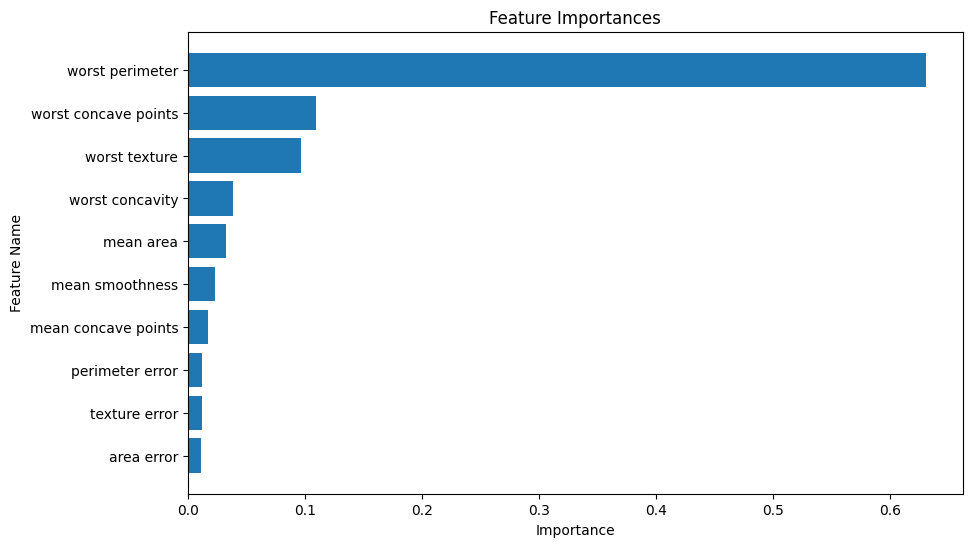

In [7]:
# COMPLETAR.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier


arbol = DecisionTreeClassifier(max_depth=9, random_state=42, criterion='entropy')
arbol.fit(X_train, y_train)
importance = arbol.feature_importances_

indices = np.argsort(importance)[::-1]



top_n = 10
top_indices = indices[:top_n]

sorted_indices = top_indices[::-1]  # invierte el orden para mayor a menor

feature_names = X_train.columns
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(top_n), importance[sorted_indices], align="center")
plt.yticks(range(top_n), feature_names[sorted_indices])
plt.xlabel("Importance")
plt.ylabel("Feature Name")
plt.show()


### **Consigna 6**

> Graficar el árbol de la consigna anterior. *Tip*: ver la función `dibujar_arbol` provista en la próxima celda. Responder:
> * ¿Qué representa cada nodo?
> * ¿Qué información contiene cada nodo?
> * ¿Qué representa la gama (celeste vs. naranja) del color?
> * ¿Qué representa la intensidad (baja vs. alta) del color?
> * ¿Qué representan los ejes?

In [10]:
# Usuarios de Windows: descomentar la siguiente línea.
!pip3 install pydotplus

# Usuarios de macOS: descomentar las siguientes dos líneas (puede demorar un poco).
# !brew install graphviz
# !pip install -U pydotplus

import sklearn
from six import StringIO
from IPython.display import Image, display
import pydotplus
from sklearn.datasets import load_breast_cancer

data_cancer = load_breast_cancer()

def dibujar_arbol(clf,
                  c_name = data_cancer.target_names,
                  f_name = data_cancer.feature_names):

    dot_data = StringIO()

    sklearn.tree.export_graphviz(clf,
                                 out_file = dot_data,
                                 filled = True,
                                 class_names = c_name,
                                 feature_names = f_name,
                                 special_characters = True)

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    display(Image(graph.create_png()))



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


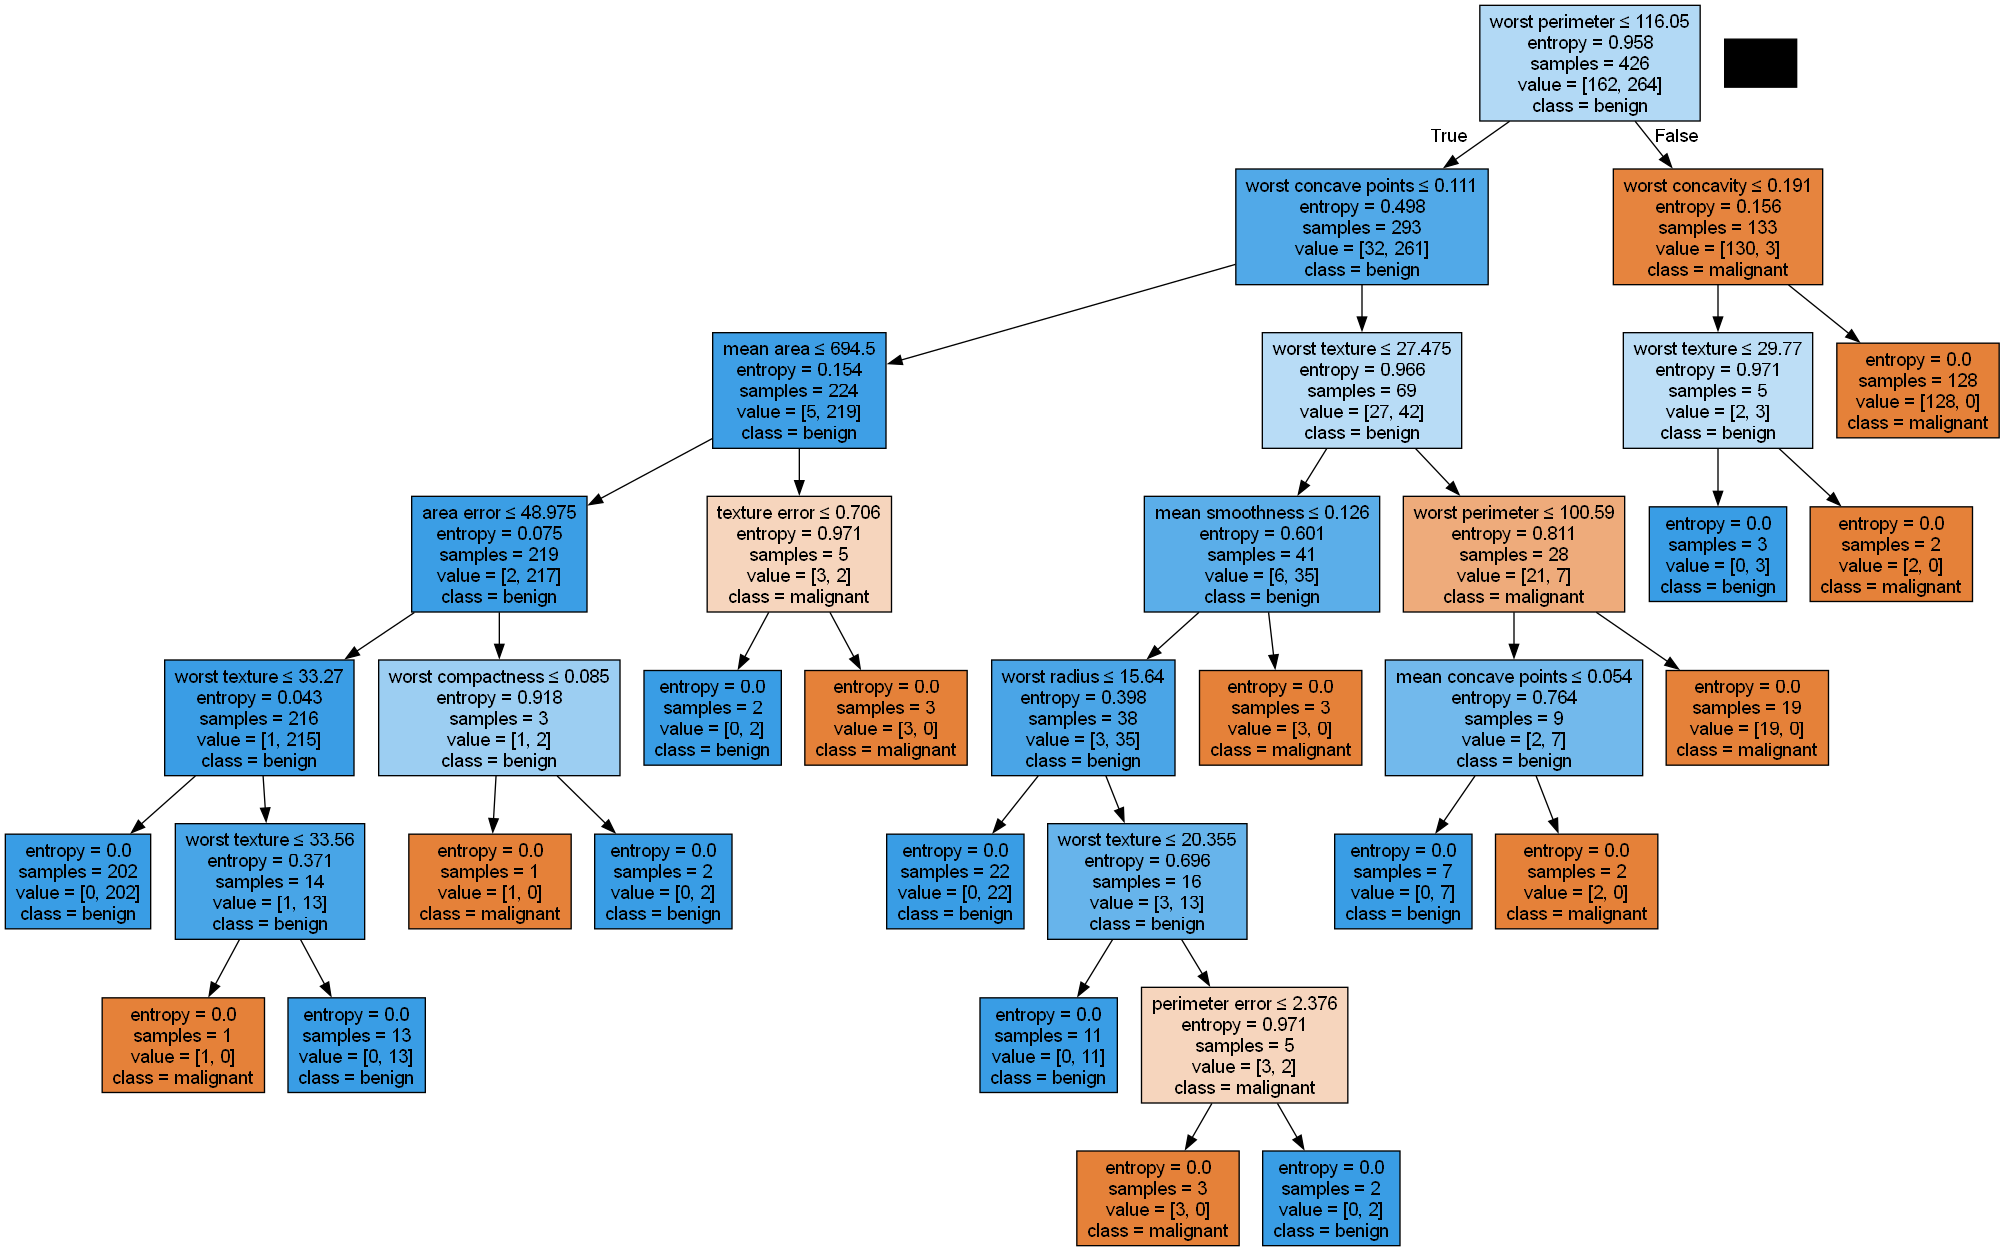

In [9]:
# COMPLETAR.
dibujar_arbol(arbol)

**Respuesta**: 

- Cada nodo es un punto de decisión donde el árbol evalúa una condición sobre una característica del dataset.
- En cada nodo se muestra:
    - Condición de división 
    - Criterio de impureza 
    - samples: número de muestras que llegan a ese nodo.
    - value: conteo de muestras por clase
    - class: clase mayoritaria en ese nodo.
- El color indica cuál es la clase mayoritaria en ese nodo.
    - Naranja: clase malignant
    - Celeste: clase benign
- La intensidad refleja el grado de pureza del nodo:
    - Color más intenso: nodo más puro (predomina fuertemente una clase).
    - Color más claro: nodo menos puro (las clases están más mezcladas).
- En este gráfico, no hay ejes de datos como en un plano cartesiano.
    - El eje vertical representa la profundidad del árbol (de arriba hacia abajo).
    - El eje horizontal no es cuantitativo: solo organiza visualmente los nodos para que las ramas no se solapen.